Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



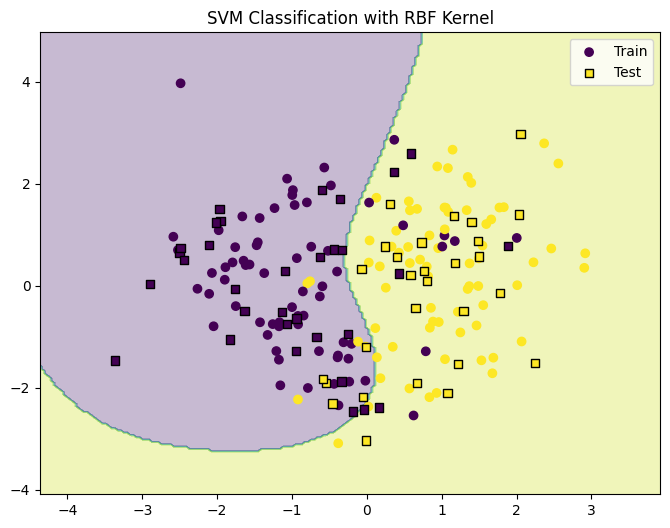

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

X, y = datasets.make_classification(
    n_samples=200, n_features=2, n_classes=2,
    n_informative=2, n_redundant=0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8,6))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label="Test")


plt.title("SVM Classification with RBF Kernel")
plt.legend()
plt.show()